
#Se instalan las librerías e importan paquetes


In [ ]:
!pip install numpy
!pip install pandas

In [ ]:

!pip install matplotlib
!pip install scikit-learn
!pip install mlxtend
!pip install efficient-apriori


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from mlxtend.preprocessing import TransactionEncoder
from efficient_apriori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df = pd.read_csv('/df_limpio.csv')

In [10]:
print ("\nEstadisticas descriptivas:")
print(df.describe())
print ("\nInformación de la base:")
print(df.info())
df.head(10)


Estadisticas descriptivas:
       Unnamed: 0.1    Unnamed: 0  edad_persona_en_situacion_de_violencia
count  89540.000000  89540.000000                            72262.000000
mean   44769.973587  12425.053484                               35.686682
std    25848.547697   7894.123336                               12.592487
min        0.000000      0.000000                                1.000000
25%    22384.750000   5596.000000                               27.000000
50%    44769.500000  11597.500000                               34.000000
75%    67155.250000  19059.250000                               42.000000
max    89540.000000  29705.000000                              103.000000

Información de la base:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89540 entries, 0 to 89539
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0.1,Unnamed: 0,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,...,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
0,0,0,2020-01-01,Tucumán,Mujer,NaN,NaN,Si,Si,No,...,No,Si,No,No,No,No,No,No,Pareja,Varon
1,1,1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,Si,Si,No,...,No,Si,No,No,No,No,No,No,Ex pareja,Varon
2,2,2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,Si,Si,No,...,No,Si,No,No,No,No,No,No,Ex pareja,Varon
3,3,3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,No,Si,No,...,No,Si,No,No,No,No,No,No,Pareja,Varon
4,4,4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,Si,Si,No,...,No,Si,No,No,No,No,No,No,Pareja,Varon
5,5,5,2020-01-01,Buenos Aires,Mujer,23.0,Argentina,Si,Si,No,...,No,Si,No,No,No,No,No,No,Ex pareja,Varon
6,6,6,2020-01-01,Santiago del Estero,Mujer,25.0,Paraguaya,Si,Si,No,...,No,Si,No,No,No,No,No,No,Pareja,Varon
7,7,7,2020-01-01,Santa Fe,Mujer,24.0,Argentina,Si,Si,No,...,No,Si,No,No,No,No,No,No,Ex pareja,Varon
8,8,8,2020-01-01,Santa Fe,Mujer,NaN,Argentina,Si,Si,No,...,No,Si,No,No,No,No,No,No,Pareja,Varon
9,9,9,2020-01-01,San Juan,Mujer,21.0,Argentina,Si,Si,No,...,No,Si,No,No,No,No,No,No,Pareja,Varon


##Se crea un nuevo data frame que contiene solo las columnas para ser usadas en el modelo

In [11]:
tabla_violencias = pd.read_csv('/df_limpio.csv', usecols= ["tipo_de_violencia_fisica", "tipo_de_violencia_psicologica", "tipo_de_violencia_sexual", "tipo_de_violencia_economica_y_patrimonial","tipo_de_violencia_simbolica","tipo_de_violencia_domestica"])
print(tabla_violencias.info())
tabla_violencias.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89540 entries, 0 to 89539
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   tipo_de_violencia_fisica                   89540 non-null  object
 1   tipo_de_violencia_psicologica              89540 non-null  object
 2   tipo_de_violencia_sexual                   89540 non-null  object
 3   tipo_de_violencia_economica_y_patrimonial  89540 non-null  object
 4   tipo_de_violencia_simbolica                89540 non-null  object
 5   tipo_de_violencia_domestica                89540 non-null  object
dtypes: object(6)
memory usage: 4.1+ MB
None


,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica
0,Si,Si,No,No,No,Si
1,Si,Si,No,No,No,Si
2,Si,Si,No,No,No,Si
3,No,Si,No,No,No,Si
4,Si,Si,No,No,No,Si
5,Si,Si,No,Si,No,Si
6,Si,Si,No,Si,No,Si
7,Si,Si,No,No,No,Si
8,Si,Si,No,Si,No,Si
9,Si,Si,No,Si,No,Si


#Se grafican las distribuciones unidimensionalmente

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


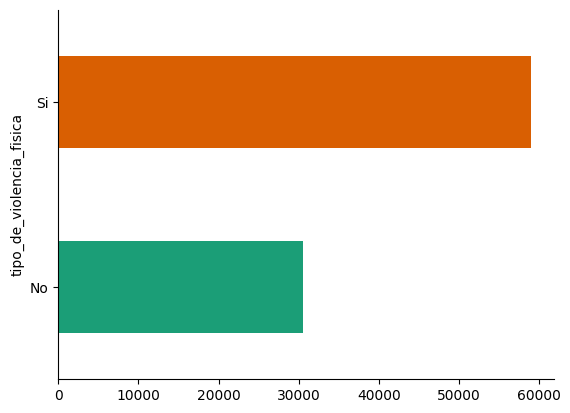

In [12]:
# @title Tipo de violencia física

from matplotlib import pyplot as plt
import seaborn as sns
tabla_violencias.groupby('tipo_de_violencia_fisica').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


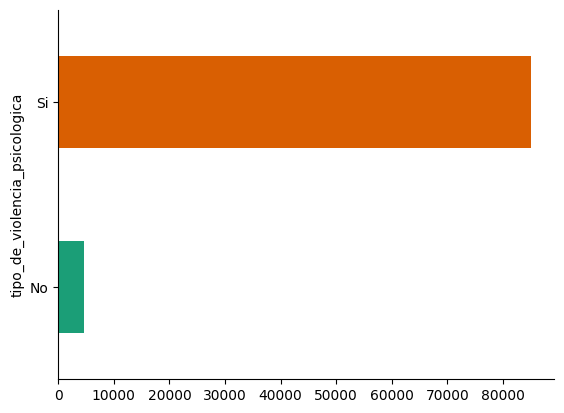

In [14]:
# @title Tipo de violencia psicológica

from matplotlib import pyplot as plt
import seaborn as sns
tabla_violencias.groupby('tipo_de_violencia_psicologica').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


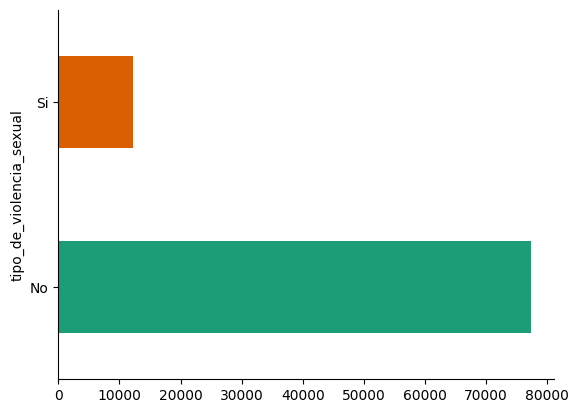

In [15]:
# @title Tipo de violencia sexual

from matplotlib import pyplot as plt
import seaborn as sns
tabla_violencias.groupby('tipo_de_violencia_sexual').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


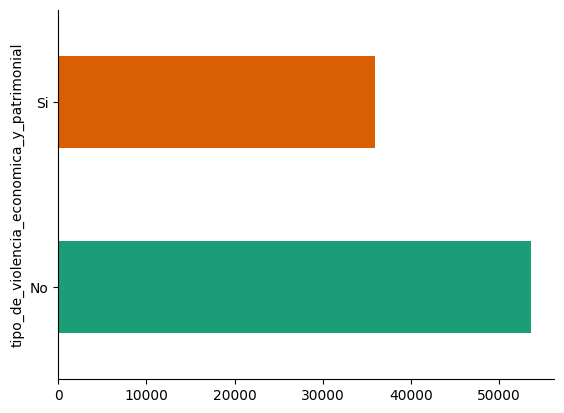

In [19]:
# @title Tipo de violencia económica y patrimonial

from matplotlib import pyplot as plt
import seaborn as sns
tabla_violencias.groupby('tipo_de_violencia_economica_y_patrimonial').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


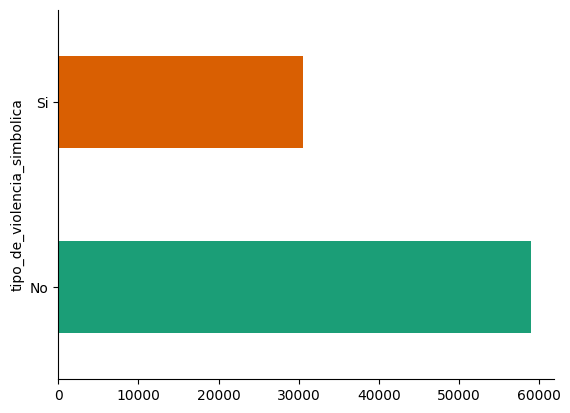

In [18]:
# @title Tipo de violencia simbólica

from matplotlib import pyplot as plt
import seaborn as sns
tabla_violencias.groupby('tipo_de_violencia_simbolica').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


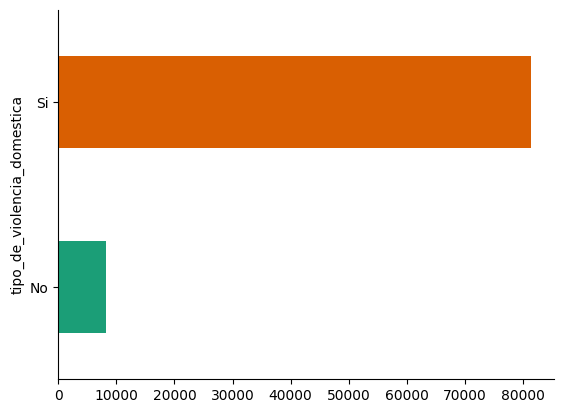

In [66]:
# @title Tipo de violencia doméstica

from matplotlib import pyplot as plt
import seaborn as sns
tabla_violencias.groupby('tipo_de_violencia_domestica').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#Se grafica un mapa de calor para observar la asociación entre las variables.
Se decide hacer el cruce entre las variables que tienen mayor respuesta de sí, por lo que se verán los cruces entre:
* Violencia física y violencia psicológica
* Violencia psicológica y violencia domésticaa
* Violencia física y violencia doméstica
* Violencia doméstica y violencia económica patrimonial
* Violencia psicológica y violencia económica patrimonial
* Violencia física y violencia económica patrimonial
* Violencia doméstica y violencia simbólica
* Violencia psicológica y violencia simbólica
* Violencia física y violencia simbólica

No se tomarán para los cruces los resultados de la violencia sexual por ser la variable con menor cantidad de respuestas positivas.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


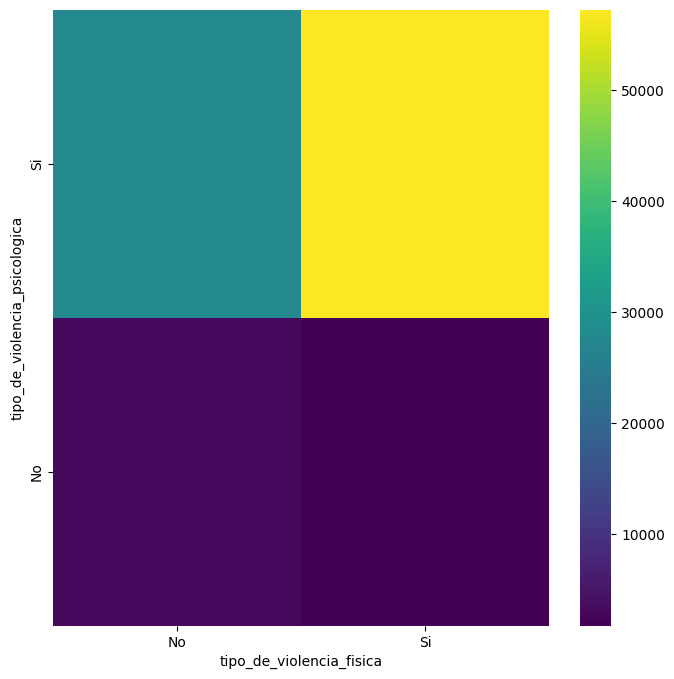

In [51]:
# @title Asociación entre tipo de violencia física y violencia psicológica

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tipo_de_violencia_psicologica'].value_counts()
    for x_label, grp in tabla_violencias.groupby('tipo_de_violencia_fisica')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_de_violencia_fisica')
_ = plt.ylabel('tipo_de_violencia_psicologica')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


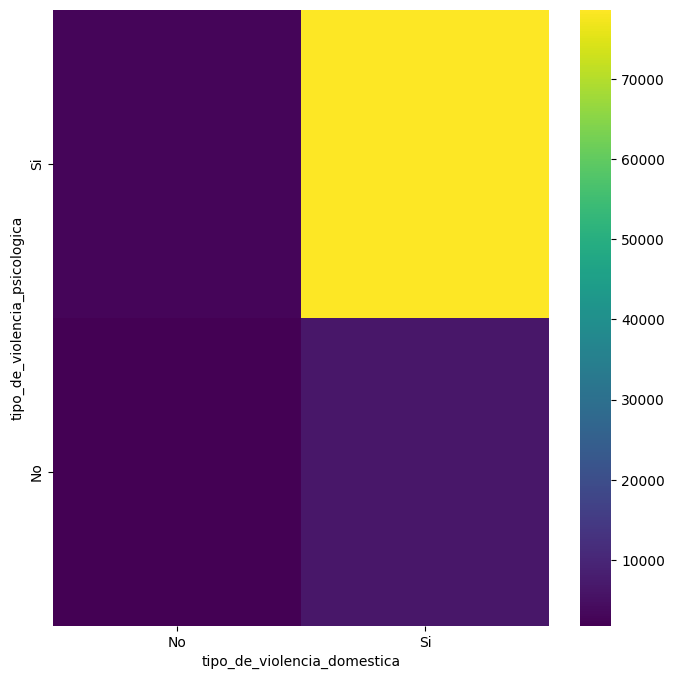

In [67]:
# @title Asociación entre tipo de violencia psicológica y violencia doméstica

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tipo_de_violencia_domestica'].value_counts()
    for x_label, grp in tabla_violencias.groupby('tipo_de_violencia_psicologica')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_de_violencia_domestica')
_ = plt.ylabel('tipo_de_violencia_psicologica')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


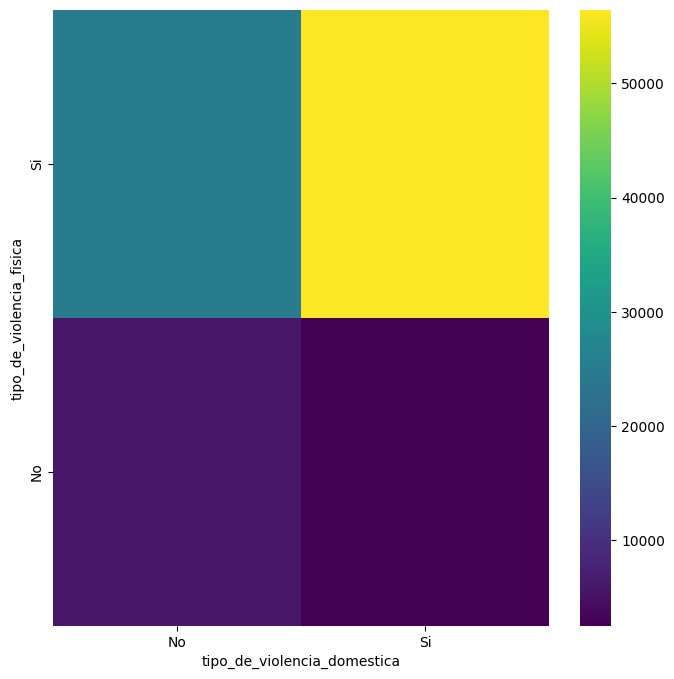

In [68]:
# @title Asociación entre tipo de violencia física y violencia doméstica


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tipo_de_violencia_domestica'].value_counts()
    for x_label, grp in tabla_violencias.groupby('tipo_de_violencia_fisica')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_de_violencia_domestica')
_ = plt.ylabel('tipo_de_violencia_fisica')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


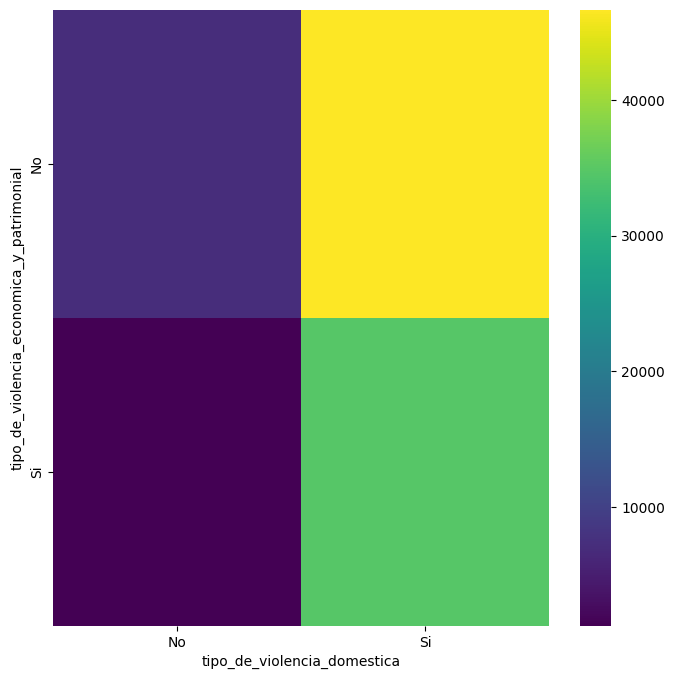

In [72]:
# @title Asociación entre tipo de violencia doméstica y violencia económica patrimonial


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tipo_de_violencia_economica_y_patrimonial'].value_counts()
    for x_label, grp in tabla_violencias.groupby('tipo_de_violencia_domestica')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_de_violencia_domestica')
_ = plt.ylabel('tipo_de_violencia_economica_y_patrimonial')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


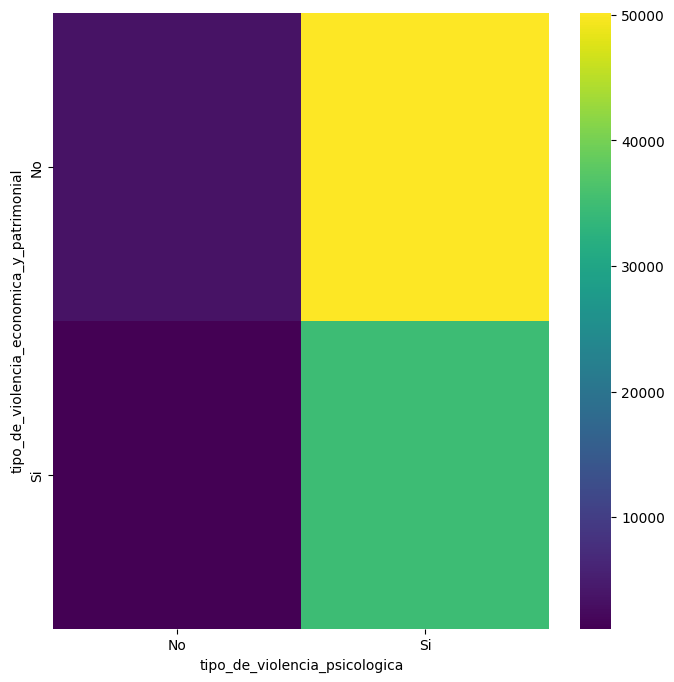

In [73]:
# @title Asociación entre tipo de violencia psicológica y violencia económica patrimonial


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tipo_de_violencia_economica_y_patrimonial'].value_counts()
    for x_label, grp in tabla_violencias.groupby('tipo_de_violencia_psicologica')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_de_violencia_psicologica')
_ = plt.ylabel('tipo_de_violencia_economica_y_patrimonial')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


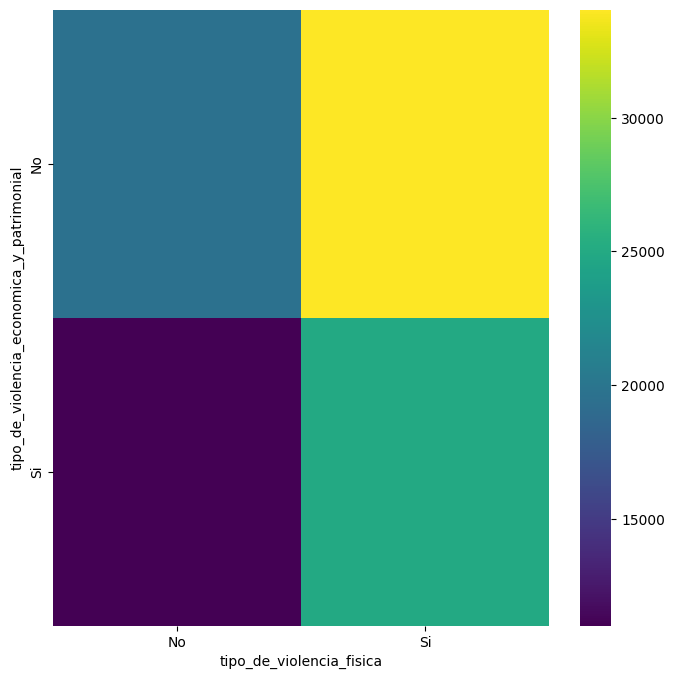

In [74]:
# @title Asociación entre tipo de violencia fisica y violencia económica patrimonial


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tipo_de_violencia_economica_y_patrimonial'].value_counts()
    for x_label, grp in tabla_violencias.groupby('tipo_de_violencia_fisica')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_de_violencia_fisica')
_ = plt.ylabel('tipo_de_violencia_economica_y_patrimonial')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


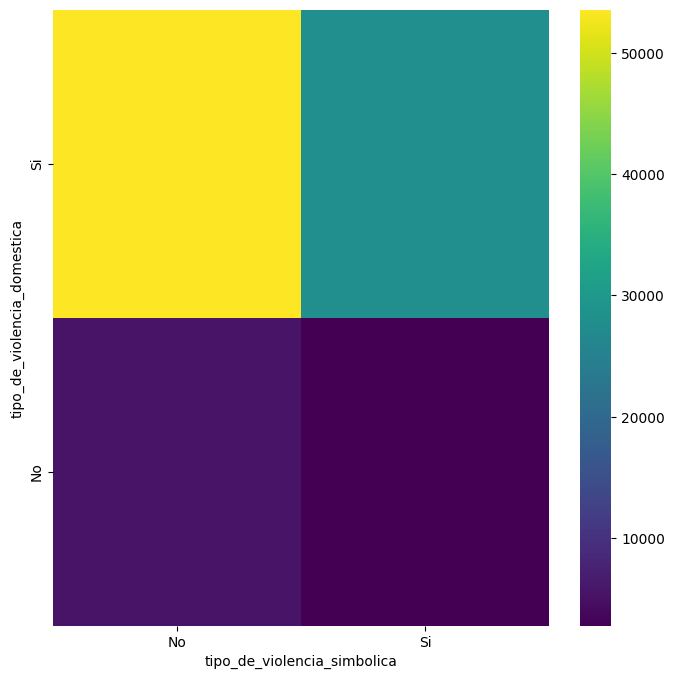

In [76]:
# @title Asociación entre tipo de violencia doméstica y violencia simbólica


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tipo_de_violencia_domestica'].value_counts()
    for x_label, grp in tabla_violencias.groupby('tipo_de_violencia_simbolica')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_de_violencia_simbolica')
_ = plt.ylabel('tipo_de_violencia_domestica')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


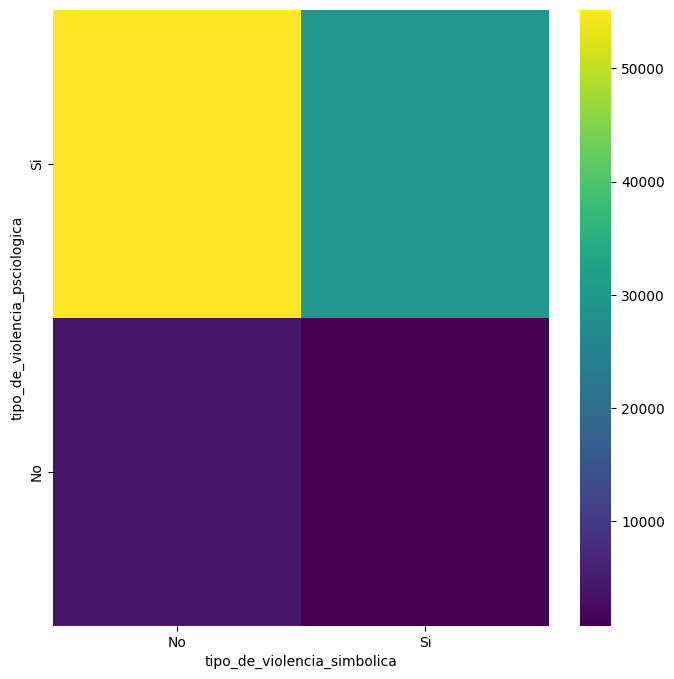

In [77]:
# @title Asociación entre tipo de violencia psicológica y violencia simbolica

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tipo_de_violencia_psicologica'].value_counts()
    for x_label, grp in tabla_violencias.groupby('tipo_de_violencia_simbolica')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_de_violencia_simbolica')
_ = plt.ylabel('tipo_de_violencia_psciologica')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


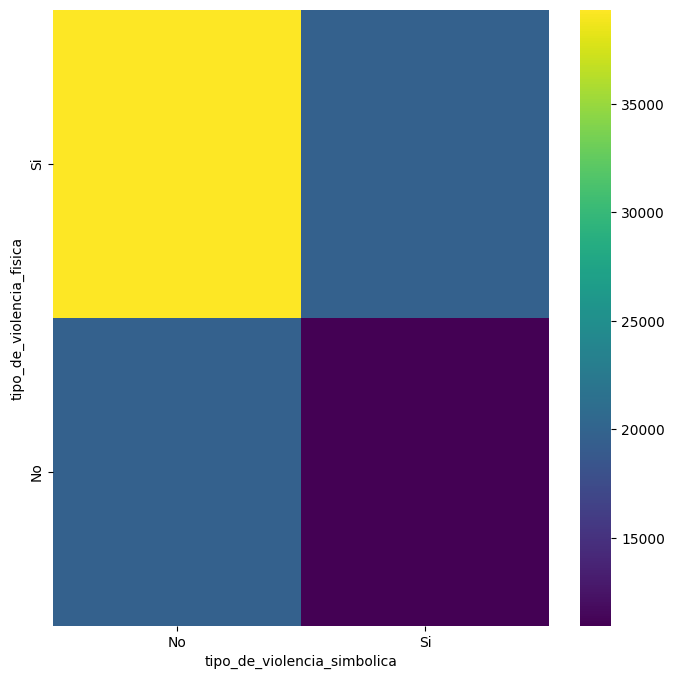

In [78]:
# @title Asociación entre tipo de violencia física y violencia simbólica

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tipo_de_violencia_fisica'].value_counts()
    for x_label, grp in tabla_violencias.groupby('tipo_de_violencia_simbolica')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_de_violencia_simbolica')
_ = plt.ylabel('tipo_de_violencia_fisica')

#Análisis de resultados del mapa de calor

En base a la lectura del mapa de caalor se puede observar que existe una mayor correlación entre las variables:
* Violencia física y violencia psicológica
* Violencia psicológica y violencia domésticaa
* Violencia física y violencia doméstica

Esto se observa a partir de encontrar una mayor cantidad de casos en los cruces positivos entre dichas variables.

En menor medida se encuentran asociadas las siguientes variables:
* Violencia doméstica y violencia económica patrimonial
* Violencia psicológica y violencia económica patrimonial
* Violencia física y violencia económica patrimonial

Los cruces con menor correlación son:
* Violencia psicológica y violencia simbólica
* Violencia doméstica y violencia simbólica
* Violencia física y violencia simbólica

In [79]:
tabla_violencias.to_csv('Tipo de violencias.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
